In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
data_path = '../../data/lda_jsd_toprev_conlen/'

In [6]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [7]:
fandom_list

['shakespare_william_works_temporal_lda_jsd_toprev_full.tsv',
 'buffy_the_vampire_slayer_temporal_lda_jsd_toprev_full.tsv',
 'les_miserables_all_media_types_temporal_lda_jsd_toprev_full.tsv',
 'one_direction_temporal_lda_jsd_toprev_full.tsv',
 'ms_paint_adventures_temporal_lda_jsd_toprev_full.tsv',
 'marvel_temporal_lda_jsd_toprev_full.tsv',
 'kuroko_no_basuke_temporal_lda_jsd_toprev_full.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_temporal_lda_jsd_toprev_full.tsv',
 'harry_potter_temporal_lda_jsd_toprev_full.tsv',
 'haikyuu_temporal_lda_jsd_toprev_full.tsv',
 'dcu_temporal_lda_jsd_toprev_full.tsv',
 'bishoujo_senshi_sailor_moon_temporal_lda_jsd_toprev_full.tsv',
 'the_walking_dead_&_related_fandoms_temporal_lda_jsd_toprev_full.tsv',
 'supernatural_temporal_lda_jsd_toprev_full.tsv',
 'doctor_who_&_related_fandoms_temporal_lda_jsd_toprev_full.tsv',
 'homestuck_temporal_lda_jsd_toprev_full.tsv',
 'arthurian_mythology_&_related_fandoms_temporal_lda_jsd_toprev_full.tsv',
 'attack_on_tita

Number of works in each fandom

In [20]:
fandom_size = {}
s = 0
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    fandom_size[len(df)] = f.split('.')[0]
    s += len(df)

In [21]:
s

701635

In [9]:
sum(fandom_size.keys())

701635

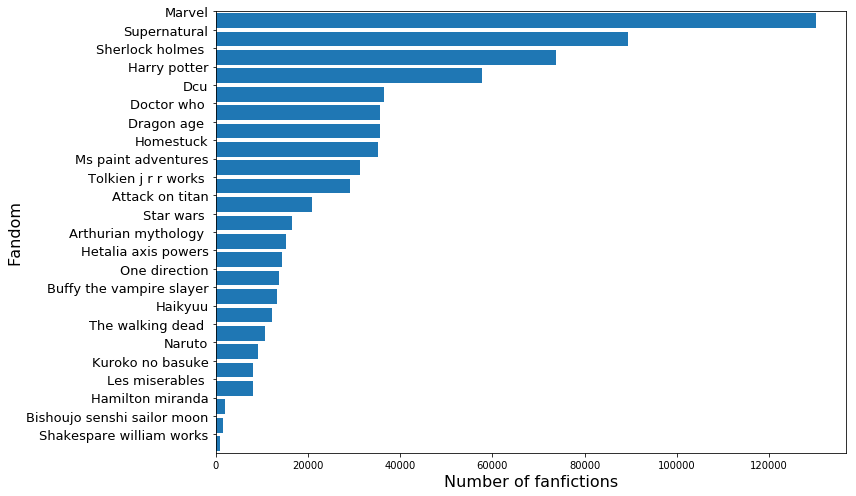

In [16]:
plt.figure()
plt.figure(figsize = (12,7))
idx = np.arange(len(fandom_size))
data = sorted(fandom_size.keys())
labels = [fandom_size[i].replace('_temporal_lda_jsd_toprev_full', '').replace('all_media_types', '').replace("&_related_fandoms", '').\
          replace("_", ' ').capitalize() for i in sorted(fandom_size.keys())]
plt.barh(idx, data)
plt.yticks(idx + 0.5,labels,fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.5, 23.5)
plt.ylabel("Fandom", fontsize = 16)
plt.xlabel("Number of fanfictions", fontsize = 16)
plt.tight_layout()
plt.savefig("fandom_size.pdf", type="pdf")

Length distribution

In [6]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [7]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [19]:
for f in os.listdir(data_path):
    word_month = {}
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    tl = create_timelist(df)
    for t in tl:
        df_t = create_df_time(df,t)
        word_month[t] = df_t.Words.sum()
    for k,v in word_month.items():
        print(k,v)
    break


Kudos/Comments

In [23]:
kudos_all = []
comments_all = []
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df.Kudos = df.Kudos/df.Chapters
    for item in df.Kudos.tolist():
        kudos_all.append(item)
    for item in df.Comments.tolist():
        comments_all.append(item)
 

In [24]:
# plt.figure(figsize = (10,7))
x1 = [i if not np.isnan(i) else 0 for i in kudos_all ]
x2 = [i if not np.isnan(i) else 0 for i in comments_all ]
# print (len(x),len(y))
# data = np.vstack([x, y]).T

In [26]:
comments_all[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 5, 1]

In [ ]:
X = np.log(sorted(kudos_list))
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.ylabel('P(Kudos)',fontsize = '14')
plt.xlabel("Log of Kudos", fontsize='14')
plt.savefig('kudos_dist.pdf', type='pdf')


/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


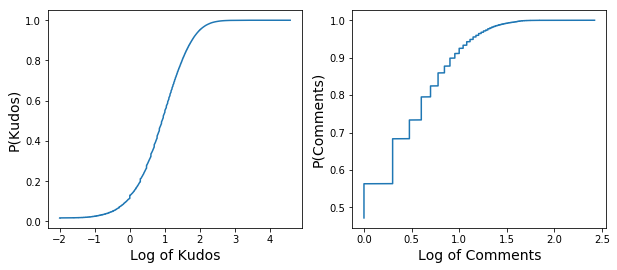

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)

X = np.log10(sorted(x1))
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.xlabel('Log of Kudos',fontsize = '14')
plt.ylabel("P(Kudos)", fontsize='14')

plt.subplot(1, 2, 2)

X = np.log10(sorted(x2))
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Comments')
plt.xlabel('Log of Comments',fontsize = '14')
plt.ylabel("P(Comments)", fontsize='14')
plt.savefig('kudos_comments_dist.pdf', type='pdf')



In [5]:
def create_timewindow(timelist, window_len):
    idx = 0
    window_all = []
    while idx <= len(timelist) - window_len:
        time_window = []
        for i in range(0, window_len):
            time_window.append(timelist[idx + i])
        idx += 1
        window_all.append(time_window)
    return window_all

In [13]:
def create_df_time(df, time_window):
    return df[df.PublishDate.str[:7] == time]

In [14]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [19]:
l = [1,2,3,4,5]
l[:-1]

[1, 2, 3, 4]

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


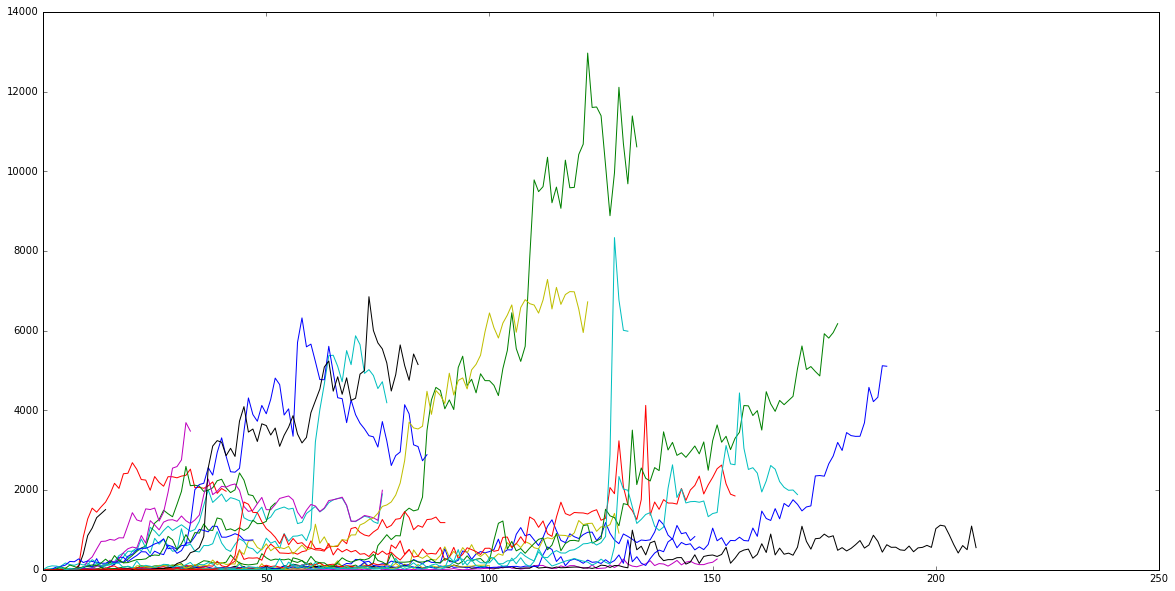

In [22]:
plt.figure(figsize = (20, 10))
label_all = []
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df = df[['Author', 'PublishDate', 'Words']]
    
    timelist = create_timelist(df)[:-1]
    time_work_dict = {}
    for time in timelist:
        df_t = create_df_time(df, time)
        time_work_dict[time] = len(df_t)
    label = sorted(time_work_dict.keys())
    label_all.append(label)
    x = range(len(label))
    y = [time_work_dict[l] for l in label]
    plt.plot(x,y)
#     plt.xticks(x, label, rotation=90)

In [32]:
authors = []
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    authors.extend(df['Author'].tolist())
print(len(set(authors)))

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


132162
